## DATA COLLECTION

In [1]:
## Data Analysis Phase
import pandas as pd
import numpy as np

import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from datetime import timedelta

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## LOAD DATA FROM CSV FILE

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## DATA DEFINITION

In [3]:
#DataFrame columns
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Column Descriptions:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into. Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

In [6]:
# categorical feature
df['SpecialDay'] = df['SpecialDay'].astype('object')
df['Month'] = df['Month'].astype('object')
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742


## DATA CLEANING

### Missing Values & NaN Checking

In [9]:
def missval (data):
    misscount = data.isnull().sum()
    misspercent = data.isnull().sum() / data.count() * 100
    misstab = pd.concat([misscount, misspercent], axis = 1, keys = ['No_missing_data', 'Percentege_missing_data'])
    return(np.transpose(misstab))
missval(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
No_missing_data,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentege_missing_data,0.113673,0.113673,0.113673,0.113673,0.113673,0.113673,0.113673,0.113673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Handle the Missing Values

In [10]:
nan=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nan['percent'] > 0
nan[pos]
#Null % seems to be constant throughout

,percent
Administrative,0.001135
Administrative_Duration,0.001135
Informational,0.001135
Informational_Duration,0.001135
ProductRelated,0.001135
ProductRelated_Duration,0.001135
BounceRates,0.001135
ExitRates,0.001135


In [11]:
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,1,1,2,3,Returning_Visitor,False,False


### Drop Missing Values

In [12]:
df.dropna(inplace = True)
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [13]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [14]:
#int features
df['Administrative'] = df['Administrative'].astype('int')
df['Informational'] = df['Informational'].astype('int')
df['ProductRelated'] = df['ProductRelated'].astype('int')

### Checking dtypes once again!

In [15]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  int64  
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  int64  
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  int64  
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  object 
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  object 
 12  Browser                  12316 non-null  object 
 13  Region                   12316 non-null  object 
 14  TrafficType           

### HANDLE DUPLICATE VALUES

In [17]:
duplicates = df[df.duplicated()]
duplicates

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Feb,1,1,1,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Mar,2,2,4,1,Returning_Visitor,False,False
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Mar,3,2,3,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,13,9,20,Returning_Visitor,False,False


In [18]:
duplicates.nunique(axis=1)

158      6
178      7
418      5
456      7
483      7
        ..
11934    6
11938    6
12159    6
12180    8
12185    9
Length: 117, dtype: int64

In [19]:
duplicates['Revenue'].unique()

array([False])

### DROP DUPLICATES

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12199.0,2.340028,3.330851,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12199.0,81.682143,177.528168,-1.0,0.000000,9.000000,94.750000,3398.750000
Informational,12199.0,0.508812,1.275817,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12199.0,34.837336,141.458499,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12199.0,32.058447,44.600911,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12199.0,1207.508189,1919.927472,-1.0,193.583333,609.541667,1477.564759,63973.522230
BounceRates,12199.0,0.020447,0.045403,0.0,0.000000,0.002930,0.016667,0.200000
ExitRates,12199.0,0.041497,0.046247,0.0,0.014223,0.025000,0.048485,0.200000
PageValues,12199.0,5.952500,18.657792,0.0,0.000000,0.000000,0.000000,361.763742


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12199 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12199 non-null  int64  
 1   Administrative_Duration  12199 non-null  float64
 2   Informational            12199 non-null  int64  
 3   Informational_Duration   12199 non-null  float64
 4   ProductRelated           12199 non-null  int64  
 5   ProductRelated_Duration  12199 non-null  float64
 6   BounceRates              12199 non-null  float64
 7   ExitRates                12199 non-null  float64
 8   PageValues               12199 non-null  float64
 9   SpecialDay               12199 non-null  object 
 10  Month                    12199 non-null  object 
 11  OperatingSystems         12199 non-null  object 
 12  Browser                  12199 non-null  object 
 13  Region                   12199 non-null  object 
 14  TrafficType           

Jadi, dapat dilihat data yang sudah clean adalah sebanyak 12199 rows, yang semula data berjumlah 12316 rows. sehingga, mengambil keputusan melakukan drop missing values dan drop duplicates, dikarenakan data yang berkurang tidak terlalu signifikan mempengaruhi seluruh data.

## OUTLIERS DETECTION

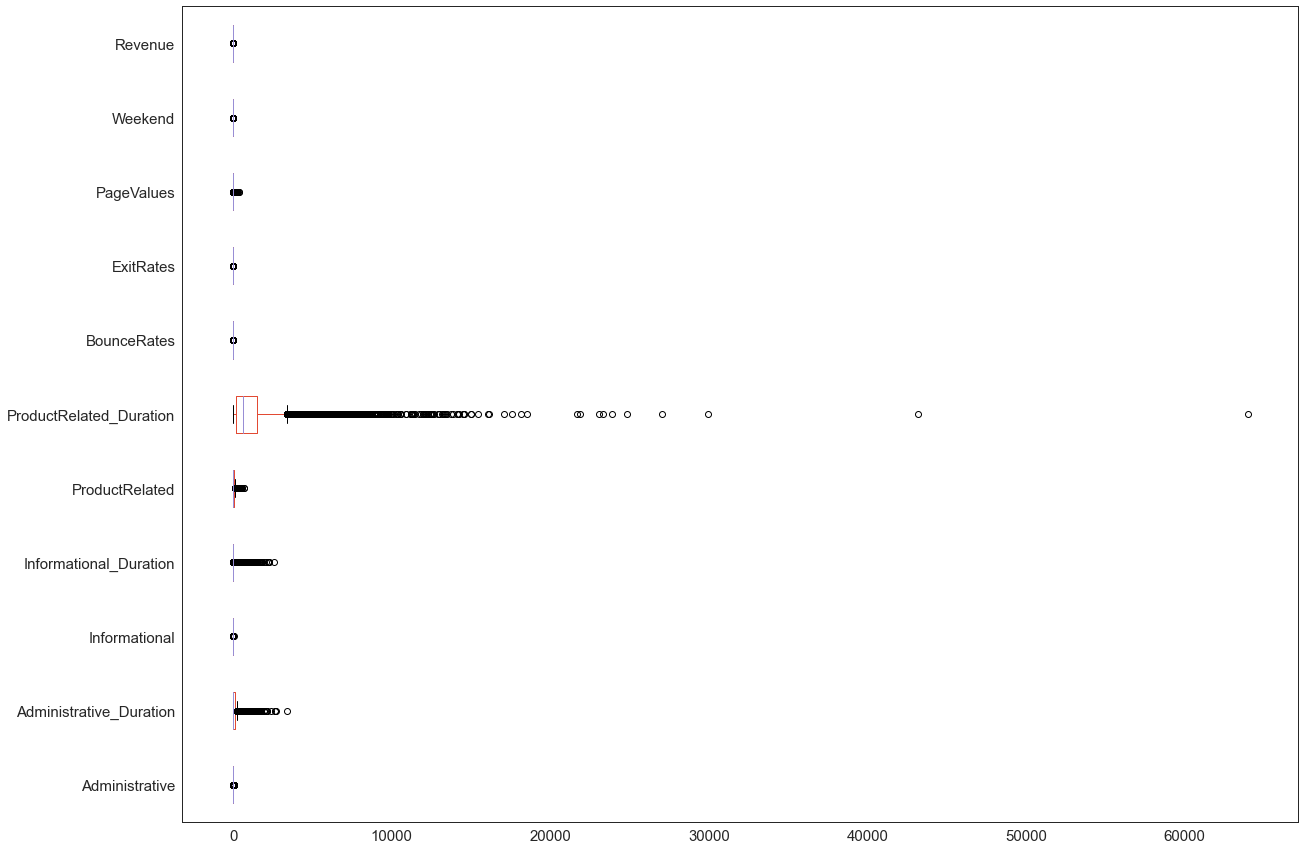

In [23]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15,figsize =(20,15))

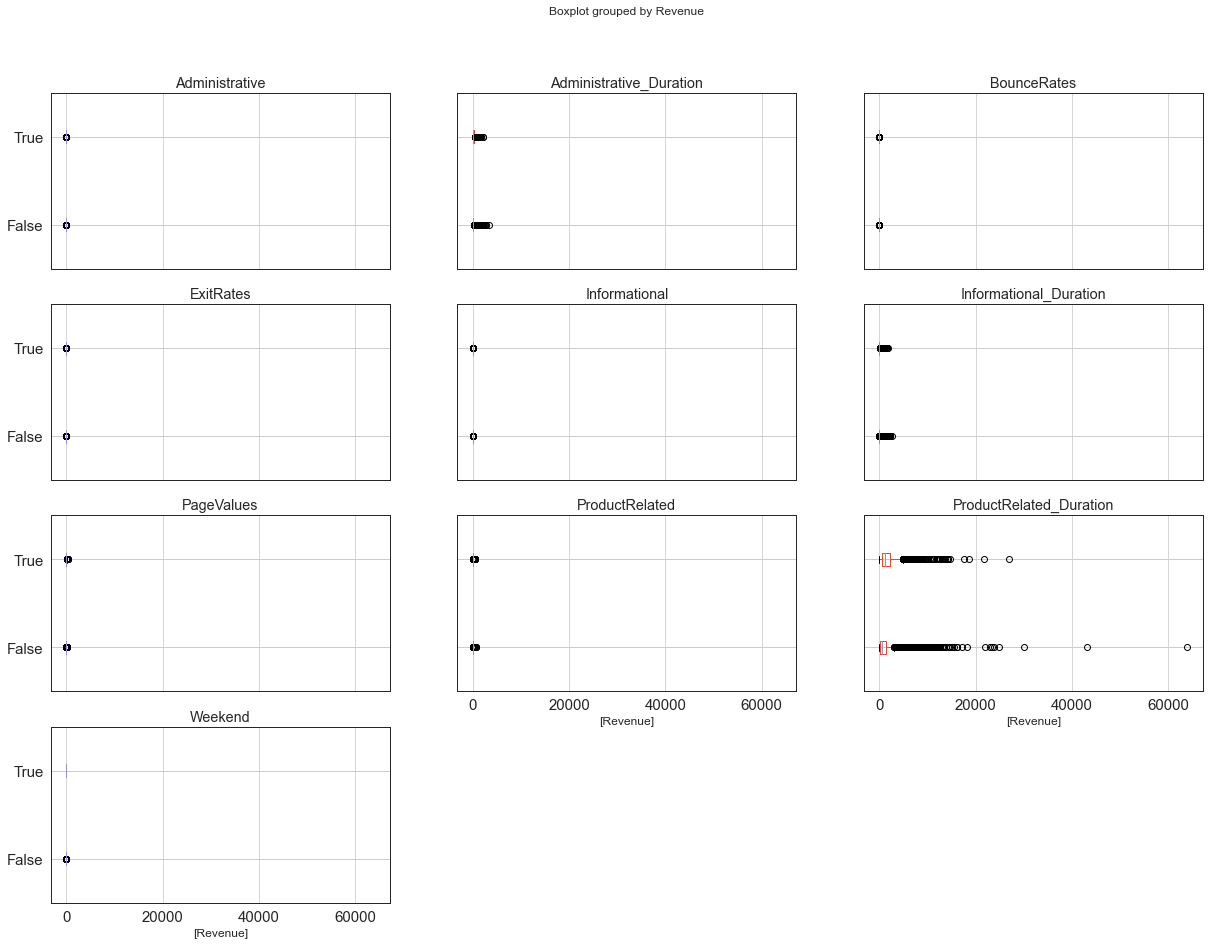

In [24]:
# create a boxplot for every column in df
boxplot = df.boxplot(grid=True, vert=False,fontsize=15,figsize =(20,15),by='Revenue')

In [25]:
df.groupby('Revenue').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,,
False,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291
True,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908


### HANDLING OUTLIERS

In [26]:
Q1 = df['ProductRelated_Duration'].quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = df['ProductRelated_Duration'].quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3-Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
df = df[~((df['ProductRelated_Duration'] < (Q1 - 1.5 * IQR)) |(df['ProductRelated_Duration']> (Q3 + 1.5 * IQR)))]

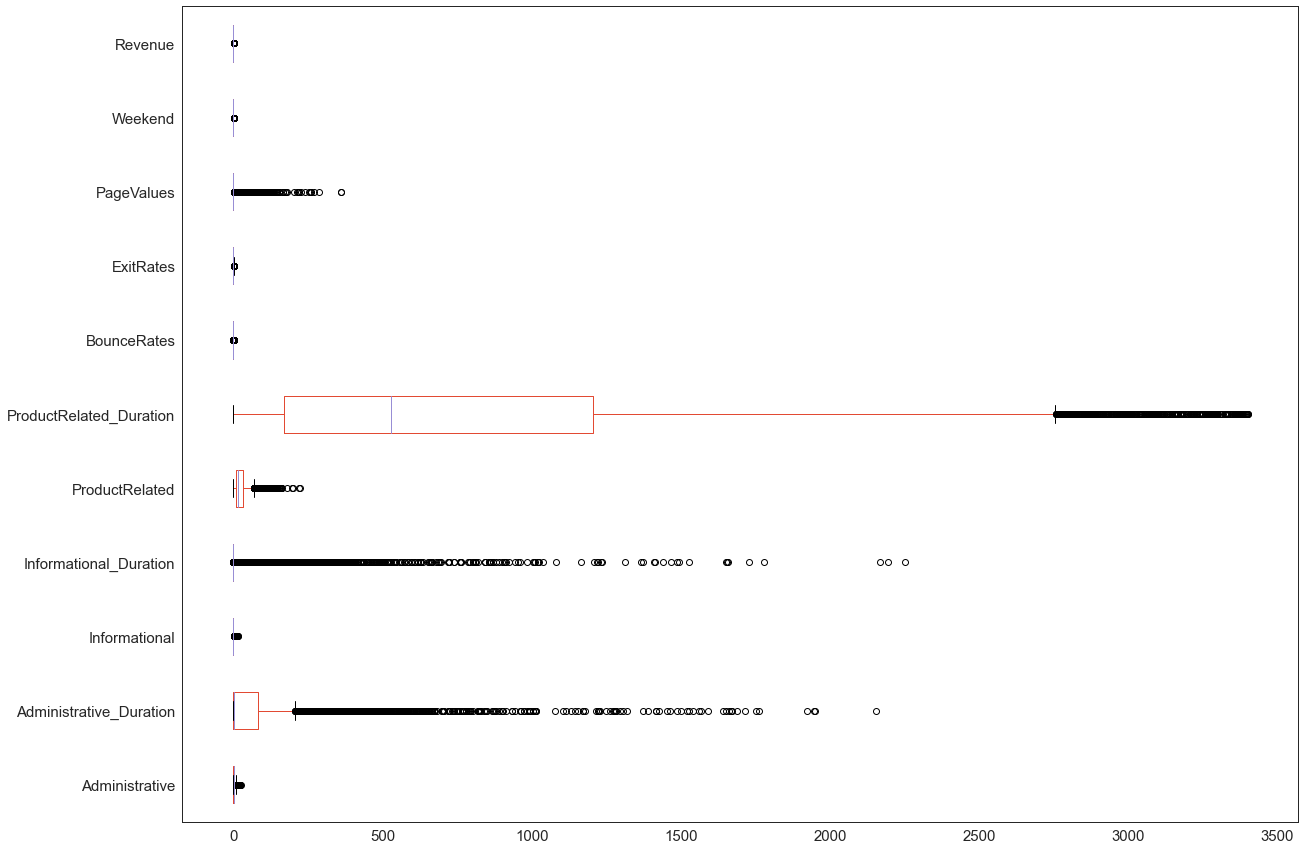

In [27]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15,figsize =(20,15))

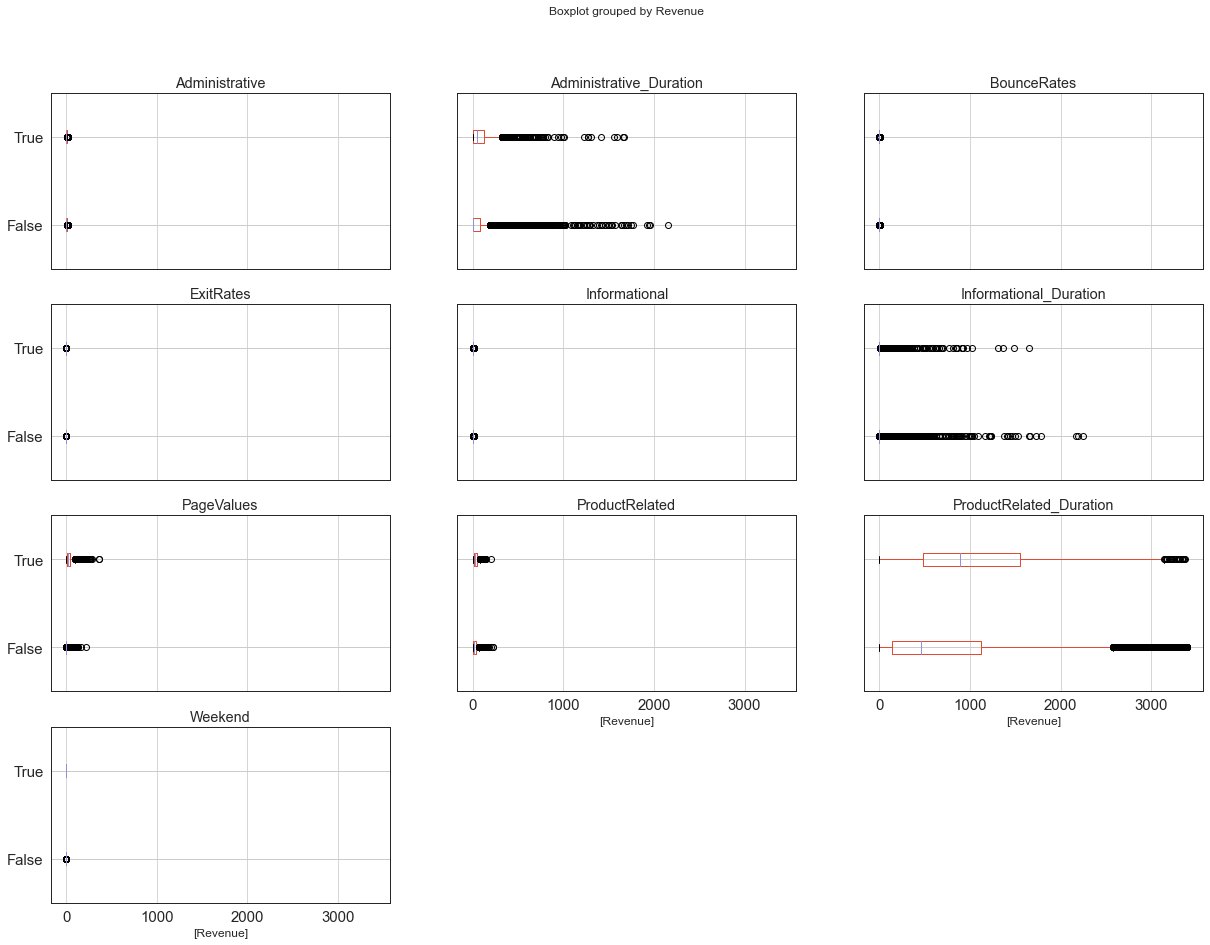

In [28]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=True, vert=False,fontsize=15,figsize =(20,15),by='Revenue')

In [29]:
df.groupby('Revenue').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,,
False,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629
True,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619


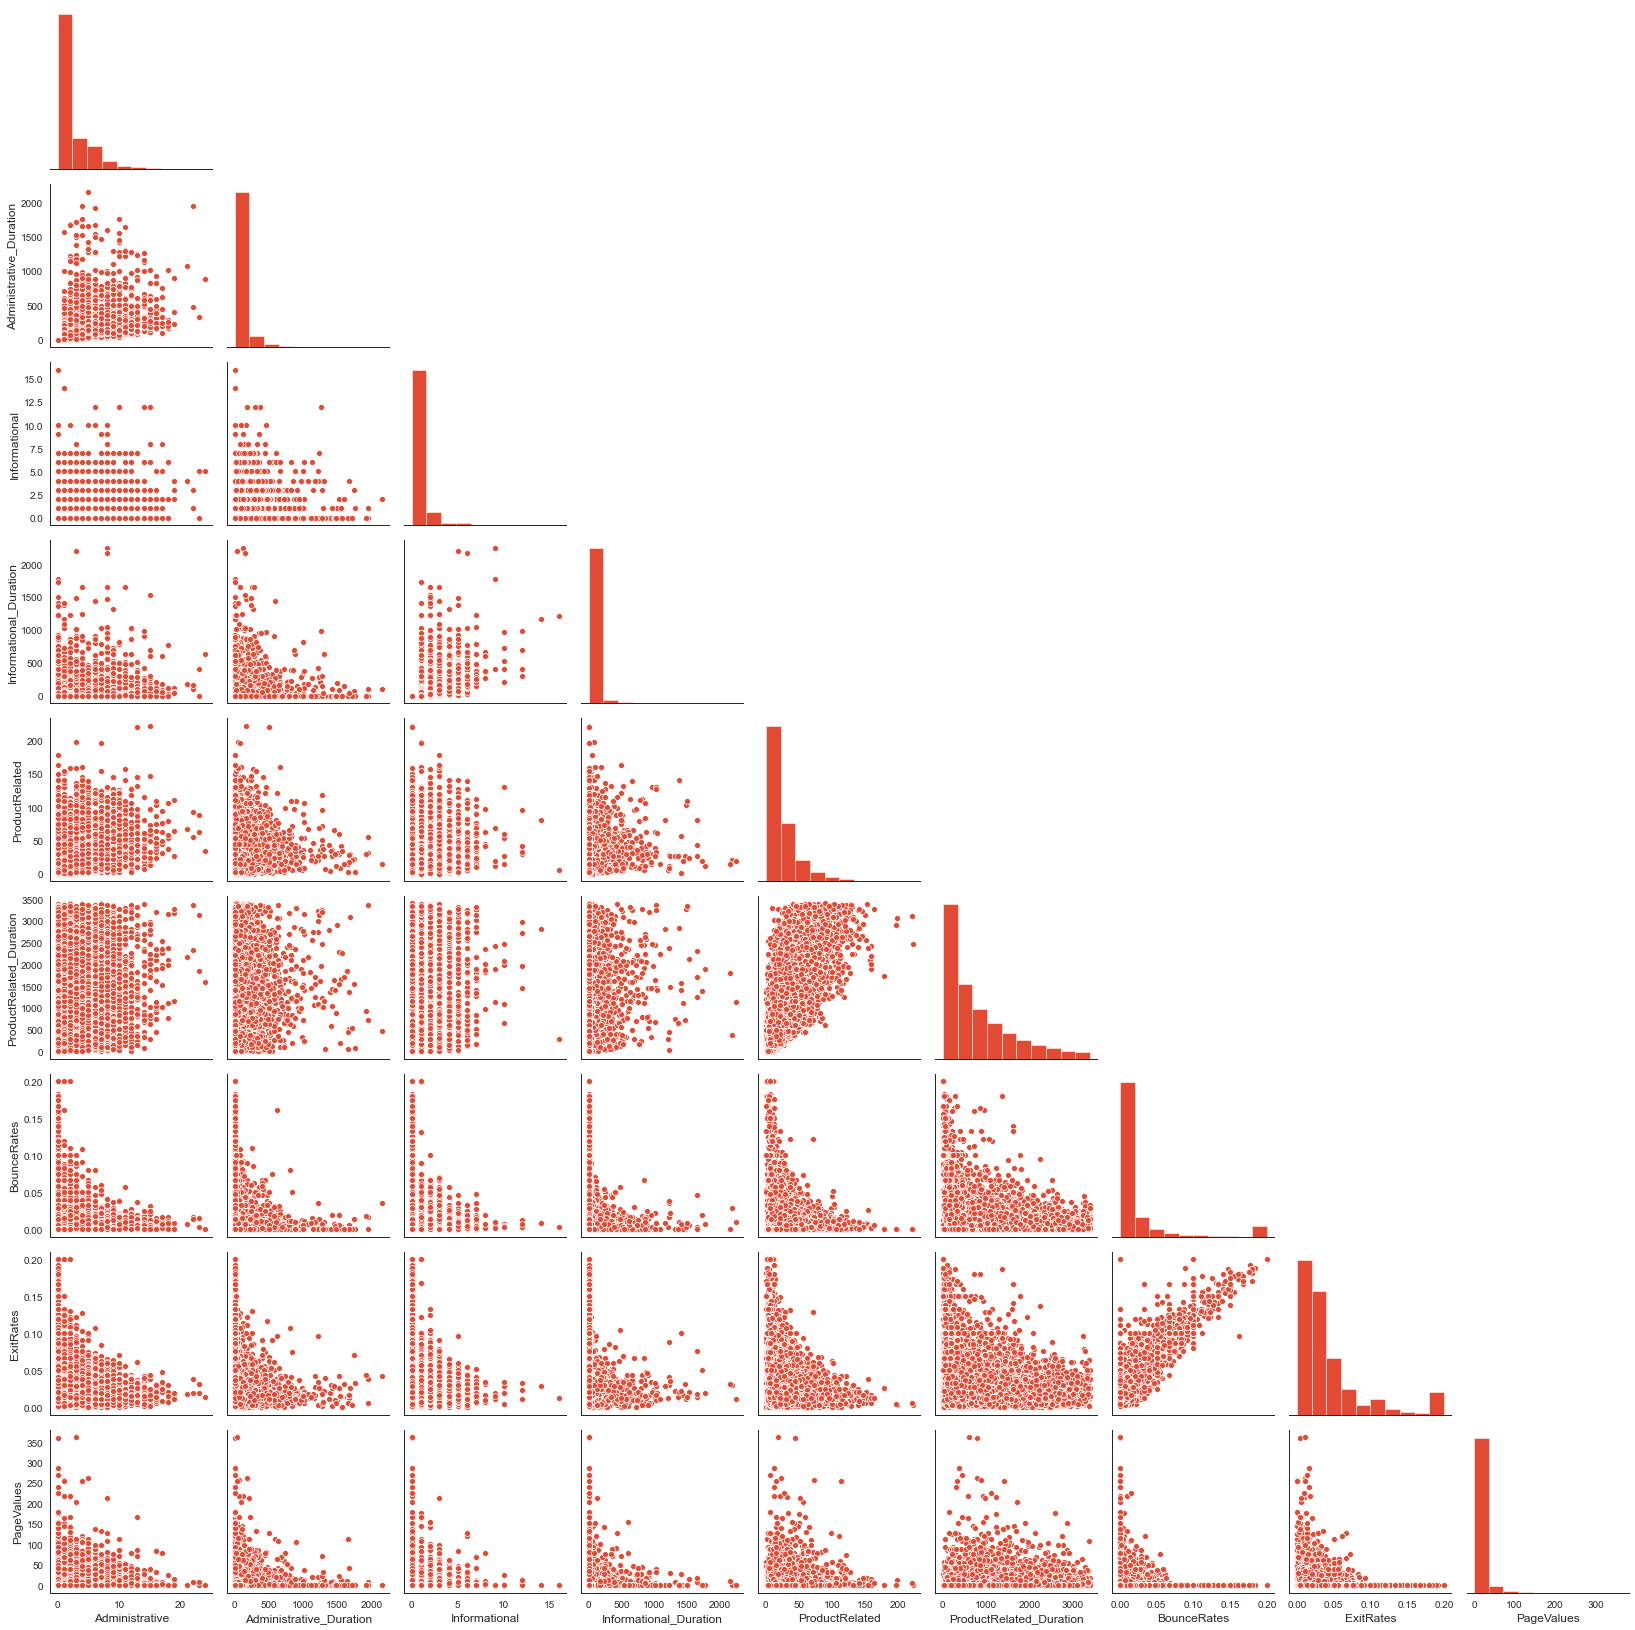

In [30]:
#df_1 = pd.concat([df.select_dtypes(exclude = ['bool','object']), df['Revenue']], axis=1)
#df_1['Revenue'] = df_1['Revenue'].astype('object')
df_1 = df.select_dtypes(exclude = ['bool','object'])
g = sns.pairplot(df_1,corner=True)

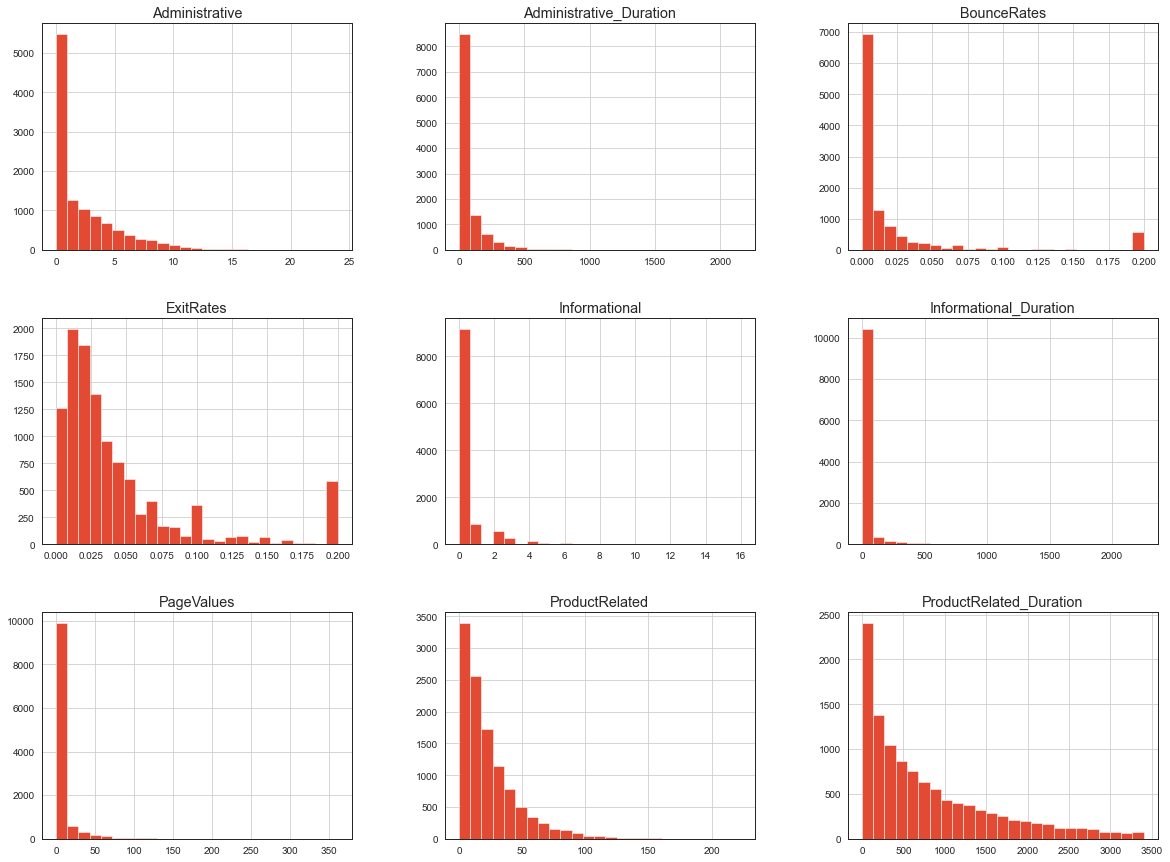

In [31]:
df_1.hist(bins = 25,figsize =(20,15))
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11248 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11248 non-null  int64  
 1   Administrative_Duration  11248 non-null  float64
 2   Informational            11248 non-null  int64  
 3   Informational_Duration   11248 non-null  float64
 4   ProductRelated           11248 non-null  int64  
 5   ProductRelated_Duration  11248 non-null  float64
 6   BounceRates              11248 non-null  float64
 7   ExitRates                11248 non-null  float64
 8   PageValues               11248 non-null  float64
 9   SpecialDay               11248 non-null  object 
 10  Month                    11248 non-null  object 
 11  OperatingSystems         11248 non-null  object 
 12  Browser                  11248 non-null  object 
 13  Region                   11248 non-null  object 
 14  TrafficType           

Jadi, dapat kita lihat data cleaning yang sudah dilakukan (drop missing values, drop duplicates, dan handling outliers) menunjukkan jumlah rows sebesar 11248

### SAVE DATA TO A NEW CSV FILE

In [33]:
df.to_csv('Final Project Clean.csv',index = False)

## DATA PREPROCESSING

### Transform Boolean and String Values into Numbers

In [34]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Because we can see, Weekend and revenue type is still Boolean, so we transform both to become integer/number.

In [35]:
df[["Weekend", "Revenue"]] = df[["Weekend", "Revenue"]].values.astype(int)

let's checkin' data type once again!

In [41]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                        int64
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
Weekend                      int64
Revenue                      int64
Other                        uint8
Returning_Visitor            uint8
dtype: object

### LABEL ENCODING

In [37]:
df.Weekend = df.Weekend.replace({True: 1, False: 0})
df.Revenue = df.Revenue.replace({True: 1, False: 0})
dummies= pd.get_dummies(df['VisitorType'],drop_first=True) 
df=pd.concat([df.drop('VisitorType', axis=1), dummies],axis=1)
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [38]:
df['Month'] = df['Month'].map({'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12})

In [39]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Other,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,2,2,1,2,0,0,0,1
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,2,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,2,3,3,1,4,1,0,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11248 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11248 non-null  int64  
 1   Administrative_Duration  11248 non-null  float64
 2   Informational            11248 non-null  int64  
 3   Informational_Duration   11248 non-null  float64
 4   ProductRelated           11248 non-null  int64  
 5   ProductRelated_Duration  11248 non-null  float64
 6   BounceRates              11248 non-null  float64
 7   ExitRates                11248 non-null  float64
 8   PageValues               11248 non-null  float64
 9   SpecialDay               11248 non-null  object 
 10  Month                    11248 non-null  int64  
 11  OperatingSystems         11248 non-null  object 
 12  Browser                  11248 non-null  object 
 13  Region                   11248 non-null  object 
 14  TrafficType           